Ce notebook décrit le Projet 10 qui utilise un jeu de données portant sur des données de chatbot afin de déveloper un chatbot pour l'entreprise Fly Me et aider les utilisateurs à choisir une offre de voyage.

# Projet 10 : Chatbot

- L'objectif de ce projet est de mettre en œuvre un chatbot pour l'entreprise Fly Me

- La première étape de ce projet est de construire un MVP qui aidera les employés de Fly Me à réserver facilement un billet d’avion pour leurs vacances.

- Nous allons utiliser des données disponibles en ligne pour développer l'application chatbot
https://www.microsoft.com/en-us/research/project/frames-dataset/download/



## Concepts d'un Chatbot

Ce premier MVP nous permettra de pouvoir tester rapidement et à grande échelle le concept et les performances du chatbot.

## Développement d'un Chatbot sur Azure

Il existe plusieurs façons d'implémenter un chatbot à l'aide d'Azure:

- Utiliser Azure Bot Service : Azure Bot Service est un service géré qui vous aide à créer, connecter et déployer des chatbots et des assistants virtuels. Il fournit des outils et des ressources pour créer, tester et déployer des chatbots, et il s'intègre à divers services Azure et canaux de communication populaires tels que Skype, Microsoft Teams et Slack.

- Utiliser Azure Functions et Azure Bot Framework : vous pouvez utiliser Azure Functions pour créer des chatbots à l'aide d'Azure Bot Framework. Azure Functions est un service de calcul sans serveur qui vous permet d'exécuter du code à la demande, et Azure Bot Framework est un ensemble d'outils et de ressources pour créer des chatbots.

- Utiliser Azure Cognitive Services : Azure Cognitive Services est une collection d'API d'apprentissage automatique que vous pouvez utiliser pour créer des chatbots et d'autres applications intelligentes. L'une des API disponibles dans Cognitive Services est l'API Language Understanding (LUIS), qui vous permet de créer des chatbots capables de comprendre le langage naturel et d'effectuer des tâches en fonction des entrées de l'utilisateur.

## Les Fonctionnalités du Chatbot

Les fonctionnalités de la V1 du chatbot : La V1 devra pouvoir identifier dans la demande de l’utilisateur
les cinq éléments suivants :

-Ville de départ

-Ville de destination

-Date aller souhaitée du vol

-Date retour souhaitée du vol

-Budget maximum pour le prix total des billets

### Comportement du Chatbot

- Si un des éléments est manquant, le chatbot devra pouvoir poser les questions pertinentes (en anglais) à l’utilisateur pour comprendre complètement sa demande.

- Lorsque le chatbot pense avoir compris tous les éléments de la demande de l’utilisateur, il doit pouvoir reformuler la demande de l’utilisateur et lui demander de valider sa compréhension.



## Méthodologie

- Automatiser au maximum la chaîne de traitement d’intégration et de développement dès le début du projet, puis itérer progressivement plutôt que de travailler en séquentiel.

## La Stack Technique

- le code du projet soit dès le début stocké sur Github et que les services Azure soient utilisés au maximum.

Quatre outils suivants pour faciliter la réalisation de cette V1 :


- Le code source du framework de développement Python de Microsoft Bot “Microsoft Bot Framework SDK v4 for Python”.


- Le service cognitif LUIS d’Azure qui permet de faire une analyse sémantique d’un message saisi par l’utilisateur et le structurer pour traitement par le bot (il devrait te permettre d’identifier les cinq éléments demandés)


- Le service Web App d’Azure qui permet d’exécuter une application Web sur le Cloud Azure (Tu n’auras pas besoin d’utiliser le service Azure Bot)


- Le Bot Framework Emulator qui te permettra de tester en local et en production ton chatbot. Il s’agit d’une interface qui permet à un utilisateur d’échanger avec le chatbot

## Analyse de la Performance du Chatbot

La valeur ajouté de l'entreprise Fly Me est donc de : Suivre et analyser la performance du Chatbot



Au sujet du suivi de la performance du chatbot lorsqu’il sera en production :


- Dans le cas où  les mauvaises réponses du chatbot détériorent grandement l’utilisation du service par les collaborateurs ou les clients , on peut utiliser :


- le service Azure application insight qui permettra de suivre et d’analyser l’activité du chatbot en production.De plus, cet outil te permettra de lever une alerte lorsque le chatbot donnera plusieurs mauvaises réponses à des utilisateurs.


- Pour la pertinence des réponses du chatbot, on veut déjà pouvoir évaluer la performance du modèle LUIS sous-jacent hors-ligne : développer les scripts permettant l’entraînement et l’évaluation du modèle.


- Réfléchir à une méthodologie pour le suivi de la performance du modèle et sa mise à jour en production et la formaliser

Voici un lien vers un article Medium qui te permettra de mieux appréhender cette problématique :

https://medium.com/analytics-and-data/overview-of-the-different-approaches-to-putting-machinelearning-ml-models-in-production-c699b34abf86

## Contenu de ce Notebook 

Nous allons exposer trois prinipales parties permettant de préparer une réponse à My Content : 

- 1. Prépartion du Jeu de données


- 2. Conception d'un chatbot de réservation de vacances


- 3. Développement du chatbot sur Azure

In [1]:
# numpy and pandas for data manipulation
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd 
 # File system manangement
import os
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from datetime import datetime
from pandas.api.types import is_numeric_dtype
import random
import datetime as dt

import json

from sklearn.model_selection import train_test_split


import time
import os

from azure.cognitiveservices.language.luis.authoring import LUISAuthoringClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient

import requests

from luis_evaluation.utility import LuisApp


# matplotlib and seaborn for plotting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
#import seaborn as sns
import time
import math
 



# 1. Présentation générale du jeu de données

Il contient des historiques d’échange entre un chatbot et un utilisateur. Il est plus riche que ce dont nous avons besoin pour la V1 mais cela nous permettra de garder le même jeu de données pour les prochaines étapes du projet et donc de gagner du temps. 
 

In [86]:
# files list
print(os.listdir("inputs"))

os.listdir("inputs")

['frames.json', 'frames_pretty.json', 'luis.json']


['frames.json', 'frames_pretty.json', 'luis.json']

## 2. Description du jeu de données

### Frames Dataset

https://www.microsoft.com/en-us/research/project/frames-dataset/download/


In [3]:
data_dir = './inputs'

### Le Dataset  frames.json

In [87]:
# customers
df = pd.read_json('inputs/frames.json')
print('data shape: ', df.shape)
print('data info:', df.info())
df.head()

data shape:  (1369, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1369 non-null   object
 1   turns      1369 non-null   object
 2   wizard_id  1369 non-null   object
 3   id         1369 non-null   object
 4   labels     1369 non-null   object
dtypes: object(5)
memory usage: 53.6+ KB
data info: None


,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


In [16]:
import json

# Load the frames.json file
with open("inputs/frames.json", "r") as file:
    frames_data = json.load(file)

# Pretty print the JSON data
#print(json.dumps(frames_data, indent=4))


with open("inputs/frames_pretty.json", "w") as file:
    json.dump(frames_data, file, indent=4)

## 3. Exploration des données

### Analyse des colonnes :  turns et labels

In [88]:
# labels

df["labels"][0]

{'userSurveyRating': 4.0, 'wizardSurveyTaskSuccessful': True}

In [89]:
df["labels"][0].keys()

dict_keys(['userSurveyRating', 'wizardSurveyTaskSuccessful'])

In [90]:
# 
df_successful = pd.json_normalize(df["labels"])
df_successful.head()

,userSurveyRating,wizardSurveyTaskSuccessful
0,4.0,True
1,3.0,True
2,2.0,False
3,5.0,True
4,5.0,True


In [91]:
df["userSurveyRating"] = df_successful["userSurveyRating"]
df["wizardSurveyTaskSuccessful"] = df_successful["wizardSurveyTaskSuccessful"]
df.head(5)

,user_id,turns,wizard_id,id,labels,userSurveyRating,wizardSurveyTaskSuccessful
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",4.0,True
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...",3.0,True
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc...",2.0,False
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",5.0,True
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",5.0,True


In [92]:
print("Il y a ", df[df["wizardSurveyTaskSuccessful"] == False].shape[0], "dialogues avec réponse non reussie avec le bot")

Il y a  82 dialogues avec réponse non reussie avec le bot


In [103]:
# filter good userSurveyRating
df = df[df['userSurveyRating'] > 3.0]
df = df.drop(columns=['userSurveyRating', 'wizardSurveyTaskSuccessful'])
df.head(5)

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
6,U22HTHYNP,[{'text': 'I'm looking for a trip to Gotham Ci...,U21DKG18C,660f2f7a-b660-4f2c-aae9-e5cdb28d818c,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
7,U21E41CQP,"[{'text': 'Hello, I would like to book a 2-wee...",U21DMV0KA,84823cb8-4e01-4dc1-8d10-1f2a5ef40b80,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."


### Analyse de la colonne turns

In [104]:
df['turns'][0][0]

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'active_frame': 1,
  'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
     'budget': [{'val': '1700.0', 'negated': False}],
     'dst_city': [{

### les données utiles pour notre analyse

- intent : intention utilisateur (définis le domaine d'intention)
- text   : texte formulé par l'utilisateur
- labels :  liste des labels récupérer du texte utilisateur avec la clé correspondante. Voici la liste de clés utiles pour le dialogue avec le bot :


- 'dst_city'
- 'or_city'
- 'str_date'
- 'end_date'
- 'budget'

## 4. Filtrage des Informations Utiles

- Filtrer sur les informations qui nous interessent

- filtrer sur les 5 champs suivants :

"budget", "dst_city", "or_city", "str_date', 'end_date'

In [105]:
# get only useful columns

def  get_usefull_data(df):

    # Create an empty list to save the result
    result = []

    # Iterate on rows
    for turns in df['turns']:
        # Create an empty dictionary
        new_row = {}

        # Update the dictionary with the 1st input of the user
        new_row.update({'text':turns[0].get('text')})
    
        # Filter on labels > acts for each user's text
        for element in turns[0].get('labels').get('acts'):
        
            # Filter on args in labels > acts
            for item in element.get('args'):
          
                # Retrieve all key/value pairs
                new_row.update({item.get('key'):item.get('val')})

        result.append(new_row)
        

    return result

In [128]:
usefull_data = get_usefull_data(df)
usefull_data

[{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'intent': 'book',
  'dst_city': 'Atlantis',
  'or_city': 'Caprica',
  'str_date': 'Saturday, August 13, 2016',
  'n_adults': '8',
  'budget': '1700'},
 {'text': "Hi I'd like to go to Caprica from Busan, between Sunday August 21, 2016 and Wednesday August 31, 2016",
  'intent': 'book',
  'dst_city': 'Caprica',
  'or_city': 'Busan',
  'str_date': 'Sunday August 21, 2016',
  'end_date': 'Wednesday August 31, 2016'},
 {'text': 'Hello, I am looking to book a trip for 2 adults and 6 children for $21,300 or less. We are departing from Kochi for Denver.',
  'intent': 'book',
  'n_children': '6',
  'n_adults': '2',
  'budget': '$21,300',
  'or_city': 'Kochi',
  'dst_city': 'Denver'},
 {'text': "I'm looking for a trip to Gotham City leaving from Kakariko Village on Saturday, August 13, 2016. 3 adults for no more than $2400 USD.",
  'intent': 'book',
  'dst_cit

### Filtrage et Cleaning

In [137]:
# filter only on the expected 5 items;
# "budget", "dst_city", "or_city", "str_date', 'end_date'

def  transform_to_luis_data(usefull_data):


    # Convert the list to DataFrame 
    df2= pd.DataFrame.from_records(usefull_data)

    # Keep only useful columns
    df2 = df2[['text', 'or_city', 'dst_city', 'str_date', 'end_date', 'budget']]
    
    print("avant cleaning", df2.shape)
        
    #cleaning
     
    # Drop duplicate values
    df2 = df2.drop_duplicates()
    
    print("après cleaning", df2.shape)
    
   
    return df2


In [138]:
df3 = transform_to_luis_data(usefull_data) 

avant cleaning (1230, 6)
après cleaning (1193, 6)


### Remarque sur les Auteurs des dialogues

on doit  s'interesser uniquement aux dialogues formulés par le user (et non par le bot)

In [149]:
turns = df['turns']
turns_list = turns.to_list()

In [150]:
# nombre de dialogues pour author='user'
dico_author = {}
for element in turns_list:
    for message in element:
        author = message["author"]
        if not author in dico_author.keys():
            dico_author[author] = 1
        else:
            dico_author[author] += 1
dico_author

{'user': 9444, 'wizard': 8674}

## 5. Préparation des données utiles pour Luis

In [155]:
# on récupère les données utiles 
# text, intent_name, entity_labels (entity_name)


def format_data_luis(intent, text, labels):
 
    text = text.lower()

    
    # pour les entity_label on calcule les index début et fin des value dans 'text'
    def entity_format(name, value):
 
        value = value.lower()
        start = text.index(value)
        return dict(entity_name=name, start_char_index=start,
                    end_char_index=start + len(value))

    return dict(text=text, intent_name=intent,
                entity_labels=[entity_format(n, v) for (n, v) in labels])



# recupèrer clé et valeur pour : "dst_city","or_city","str_date","end_date","budget"
def get_key_value(arg):
 
    list_key = ['dst_city','or_city','str_date','end_date','budget']
    if "key" in arg and "val" in arg:
        if arg["key"] in list_key and arg['val'] != "-1" and arg['val'] != None:
            return (arg["key"],arg["val"])
    return None



### Generation des données utiles pour Luis

In [158]:
# Generation des données formatées pour LUIS

def generate_data_to_luis() :
    
    luis_data = []
    for dialog in turns_list:
        for message in dialog:
            # On récupére uniquement les echanges du user
            if message["author"] == "user":
                text = message["text"]
                acts = message["labels"]["acts"]
                dialog_list = []
                for act in acts:
                    if act["args"]:
                        for arg in act["args"]:
                            if not arg["key"] == "ref":
                                data = get_key_value(arg)
                                if data:
                                    dialog_list.append(data)
                            else:
                                annotations_list = arg['val'][0]['annotations']
                                if annotations_list:
                                    for annotation_value in annotations_list:
                                        data = get_key_value(annotation_value)
                                    if data:
                                        dialog_list.append(data)
                if dialog_list:
                    luis_data.append(format_data_luis("BookFlight", text, dialog_list))
                    
    return luis_data

In [167]:
# verification des données luis
generated_luis_data = generate_data_to_luis()
generated_luis_data[36]

{'text': "hi, i'm leaving from diagon alley and going to coruscant on a budget of $3400. the dates don't matter, but i cannot afford anything over my budget.",
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'or_city',
   'start_char_index': 21,
   'end_char_index': 33},
  {'entity_name': 'dst_city', 'start_char_index': 47, 'end_char_index': 56},
  {'entity_name': 'budget', 'start_char_index': 72, 'end_char_index': 77}]}

# 6. Creation d'une Application LUIS sur le Portal

Références

LUIS = Language Understanding Intelligence Service

https://learn.microsoft.com/en-us/azure/cognitive-services/LUIS/how-to/sign-in

https://www.youtube.com/watch?v=2iwHmaoi0wU

https://learn.microsoft.com/fr-fr/azure/cognitive-services/luis/client-libraries-rest-api?tabs=windows&pivots=programming-language-python

https://learn.microsoft.com/en-us/azure/bot-service/bot-builder-howto-v4-luis?view=azure-bot-service-4.0&tabs=python

https://westus.dev.cognitive.microsoft.com/docs/services/5890b47c39e2bb17b84a55ff/operations/5890b47c39e2bb052c5b9c31

https://www.luis.ai/applications

##  6.1 Création de l'application LUIS

Pour créer une application LUIS (Language Understanding) de flightbook sur le portail Azure voici les étapes à suivre:

1.	Se Connecter au portail Azure : https://www.luis.ai
2.	créer une nouvelle application LUIS.
3.	Une fois que l'application est créée, créer les intents puis les "entities"
4.	entraîner , tester puis publier le modèle

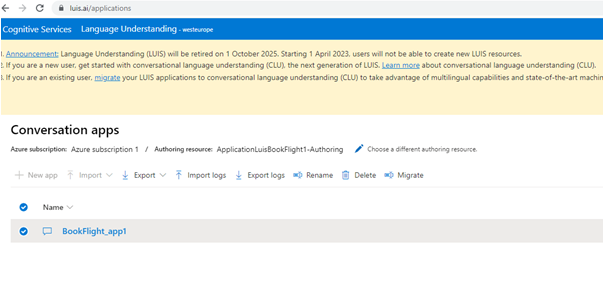

##  6.2 Création (Intents, entities) Entrainement Test et Publication du Modèle

### Créer les intents puis les "entities"  

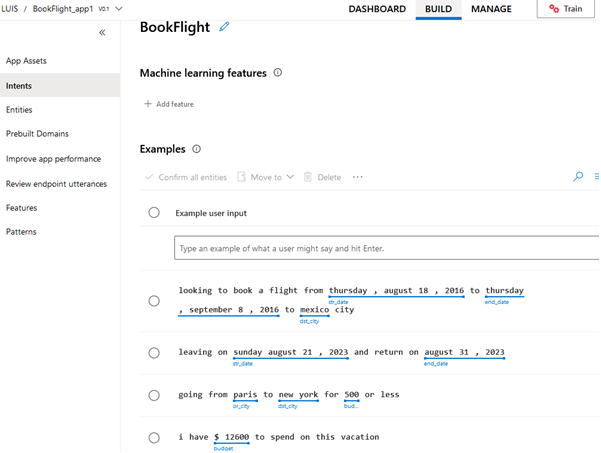

#### Entraîner , tester puis publier le modèle

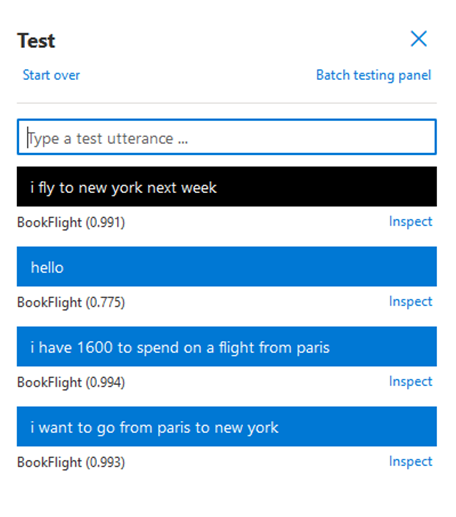

## 6.3 Entrainement de l'Application Luis Crée sur le Portal via une Batch avec l'API Luis

In [4]:
# informations sur l'application Luis à partir du Portal

AUTHORING_KEY_LUIS = "1343d42c37024ac6af71224ad01bb2b8"
AUTHORING_ENDPOINT_LUIS = "https://applicationluisbookflight1-authoring.cognitiveservices.azure.com/"
app_id = "b1c18c27-94b5-4e34-9e77-fef895a1db1b"

# Instantiate LUIS client
client = LUISAuthoringClient(AUTHORING_ENDPOINT_LUIS, CognitiveServicesCredentials(AUTHORING_KEY_LUIS))

#test app_id
client.apps.get(app_id=app_id)
print("LUIS application with ID {}".format(app_id))

LUIS application with ID b1c18c27-94b5-4e34-9e77-fef895a1db1b


In [8]:
# get LUIS Application information

information = client.apps.get(app_id)

app_version = information.active_version
app_locale = information.culture
app_desc = information.description
app_name = information.name

print("LUIS app information :\n version : {} \n local : {}  \n name : {} ".format(app_version, app_locale, app_name))

LUIS app information :
 version : 0.1 
 local : en-us  
 name : BookFlight_app1 


### Train et Test Data

In [5]:
# Load the luis.json file
with open("outputs/luis.json", "r") as file:
    data = json.load(file)

In [6]:
train_data = data[:-99]
test_data =  data[-99:]

### Entrainement avec Ajout de Labels via un Batch

documentation :

https://learn.microsoft.com/en-us/azure/cognitive-services/luis/client-libraries-rest-api?tabs=windows&pivots=programming-language-python

https://learn.microsoft.com/en-us/rest/api/cognitiveservices-luis/authoringv2.0/examples/batch?tabs=HTTP
https://github.com/Azure-Samples/cognitive-services-python-sdk-samples/blob/master/samples/language/luis/luis_authoring_samples.py

In [10]:
for i in range(0, len(train_data), 100):
    j = (i + 100)
    if j > len(train_data):
        j = len(train_data)
    client.examples.batch(app_id,app_version,train_data[i:j])

In [11]:
client.train.train_version(app_id, app_version)
waiting = True
while waiting:
    info = client.train.get_status(app_id, app_version)

    # get_status returns a list of training statuses, one for each model. Loop through them and make sure all are done.
    waiting = any(map(lambda x: 'Queued' == x.details.status or 'InProgress' == x.details.status, info))
    if waiting:
        print ("Waiting for training to complete...")
        time.sleep(10)
    else: 
        print ("trained")
        waiting = False

Waiting for training to complete...
Waiting for training to complete...
Waiting for training to complete...
trained


### Publication de l'application

In [13]:
#publish
client.apps.update_settings(app_id, is_public=True)
responseEndpointInfo = client.apps.publish(app_id, app_version, is_staging=False)

endpoint = responseEndpointInfo.endpoint_url + "?subscription-key=" + AUTHORING_KEY_LUIS + "&q="
print("Your app is published. You can now go to test it on\n{}".format(endpoint))

Your app is published. You can now go to test it on
https://westeurope.api.cognitive.microsoft.com/luis/v2.0/apps/b1c18c27-94b5-4e34-9e77-fef895a1db1b?subscription-key=1343d42c37024ac6af71224ad01bb2b8&q=


### Prédiction avec utilisation du endpoint

In [36]:
# Exemple de prédiction avec utilisation du endpoint:
    
#https://westeurope.api.cognitive.microsoft.com/luis/v2.0/apps/b1c18c27-94b5-4e34-9e77-fef895a1db1b?subscription-key=1343d42c37024ac6af71224ad01bb2b8&q=
#"i'd like to fly with children between wednesday March 1st and tuesday october 4th I have tied budget of 1000"       


{'query': '"i\'d like to fly with children between wednesday March 1st and tuesday october 4th I have tied budget of 1000"',
 'topScoringIntent': {'intent': 'BookFlight', 'score': 0.9997383},
 'entities': [{'entity': '1000 "',
   'type': 'budget',
   'startIndex': 105,
   'endIndex': 109,
   'score': 0.73646224},
  {'entity': 'october 4th',
   'type': 'end_date',
   'startIndex': 71,
   'endIndex': 81,
   'score': 0.7997194},
  {'entity': 'wednesday march 1st',
   'type': 'str_date',
   'startIndex': 39,
   'endIndex': 57,
   'score': 0.9971674}]}

### Prédiction via l'API

Une fois que le modèle est entraîné, on peut  utiliser l'API de prédiction en utilisant l'ID d'application et la clé d'abonnement fournis par le portail Azure pour l'application LUIS créée.


In [14]:
#Informations de l'instance de prédiction de Luis obtenus è partir du Portal

PREDICTION_KEY =  "bdd76fa0da7149ff9ecd53441a293be3"
PREDICTION_ENDPOINT = "https://applicationluisbookflight1.cognitiveservices.azure.com/"
clientRuntime = LUISRuntimeClient(PREDICTION_ENDPOINT, CognitiveServicesCredentials(PREDICTION_KEY))


In [19]:
# Test de prédiction sur l'instance de prediction de l'application Luis
request = { "query" : "book a flight from PARIS to NY between March and April" }

# The slot_name parameter, specify whether the application is in staging or production
response = clientRuntime.prediction.get_slot_prediction(app_id=app_id, slot_name="production", prediction_request=request)

print("Top intent: {}".format(response.prediction.top_intent))
#for intent in response.prediction.intents.keys():
#    print("intent :", intent)
    
response.prediction.entities


Top intent: BookFlight


{'or_city': ['PARIS'],
 'dst_city': ['NY'],
 'str_date': ['March'],
 'end_date': ['April']}

### Prédiction via la librairie Requests

In [23]:
# Test de prédiction en utilisant l'url endpoint
def prediction(query):
    rep = requests.get(endpoint+query)
    rep = rep.json()
    print("Top intent: {}".format(rep["topScoringIntent"]["intent"]))
    print("Entities: ")

    for entity in rep["entities"]:
        data = entity
        key = data["type"]
        value = data["entity"]
        print("{\'",key,"\' : \'",value,"\'}")

test = "i'd like to fly with children between wednesday March 1st and tuesday october 4th I have tied budget of 1000"
prediction(test)

Top intent: BookFlight
Entities: 
{' budget ' : ' 1000 '}
{' end_date ' : ' october 4th '}
{' str_date ' : ' wednesday march 1st '}


### Evaluation du modèle

In [35]:
#luis_app = LuisApp(PREDICTION_ENDPOINT,PREDICTION_KEY)
# ftaux de prédictions correctes

luis_app = LuisApp(AUTHORING_ENDPOINT_LUIS, AUTHORING_KEY_LUIS)
luis_app.get_app(app_id)

all_score, score = luis_app.evaluate(test_data)
print("accuracy score :",round(score,2)) 

accuracy score : 0.62


### Pistes d'Amelioration du modèle

- 1) Utilisation de plus de données

- 2) Ajout de patterns dans les utterances (text) :

Use a pattern to improve prediction accuracy for utterances that reveal a pattern in word order and word choice. Patterns use specific syntax to indicate the location of: entities, entity roles, and optional text.

https://learn.microsoft.com/en-us/azure/cognitive-services/luis/luis-how-to-model-intent-pattern

# 7. Conception du ChatBot de réservation de voyages avec Bot Framework

- Une fois L'application Luis est créee entrainée et testé,  on peut maintenant l'utiliser dans un Chatbot

- On peut developper l'application chatbot (avec le SDK bot framework)

https://learn.microsoft.com/fr-fr/azure/bot-service/bot-builder-basics?view=azure-bot-service-4.0

https://learn.microsoft.com/fr-fr/azure/bot-service/index-bf-sdk?view=azure-bot-service-4.0

https://learn.microsoft.com/fr-fr/azure/bot-service/bot-service-quickstart-create-bot?view=azure-bot-service-4.0&tabs=python%2Cvs

- L'application chatbot va utiliser l'application LUIS pour la prediction. https://docs.microsoft.com/en-us/azure/bot-service/bot-builder-howto-v4-luis?view=azure-bot-service-4.0&tabs=python


## Le Chatbot

Le chatbot est implanté dans un Git repository en utilisant le SDK bot framework :

https://github.com/rocchdi/ChatBot-book-flight/tree/main/chatbot-booking 

## Test du chatbot avec Bot Framework Emulator

### Emulator

Il permet de tester le bot en local.

url d'accès : http://localhost:3978/api/messages


Ressources :

https://github.com/microsoft/BotFramework-Emulator/releases/tag/v4.14.1

https://learn.microsoft.com/en-us/azure/bot-service/bot-service-debug-emulator?view=azure-bot-service-4.0&tabs=csharp

### Unit Testing

Le bot est testé en utilisant unitest avec le script suivant : unitesting.py
qui est inclu dans le repository git. On execute trois tests , un pour le test du retour de LUIS, un autre test pour
le test d'un dialgue du Framework et un troisieme test pour le tester l'entité "budget" fournie par l'utilisateur.

https://github.com/rocchdi/ChatBot-book-flight/tree/main/chatbot-booking


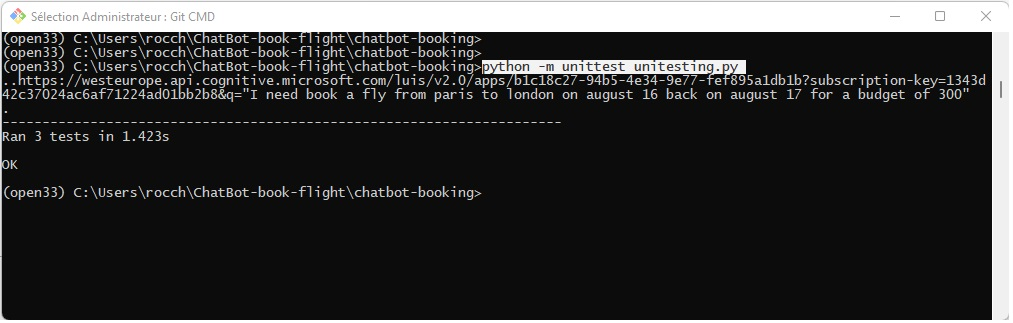
 


Ressources :


Test avec vscode :

https://code.visualstudio.com/docs/python/testing


Unitest :

https://docs.python.org/fr/3/library/unittest.html

Python Unit Testing With VS Code:

https://www.youtube.com/watch?v=6baJ5t83820

Write unit test in Microsoft bot framework using python :

https://www.youtube.com/watch?v=6XxLcK33Vx0&list=PL-PgMmMmma8DItgH7hO7oJHG8mHm8-7iA&index=3

## Utilisation du service insight

On s'intéresse ici à l'affichage des logs et alertes avec le service insight. Le service est lié au chatbot afin d'envoyer des messages de logs. Application insights permet de gnerer des alertes si plusieurs messages d'erreur du bot. Les messages d'erreur sont générés quand l'utilisateur ne confirme pas la synthese du vol affiché par le bot ou quand l'entité "budget" est mal formattée ou est égale à 0.



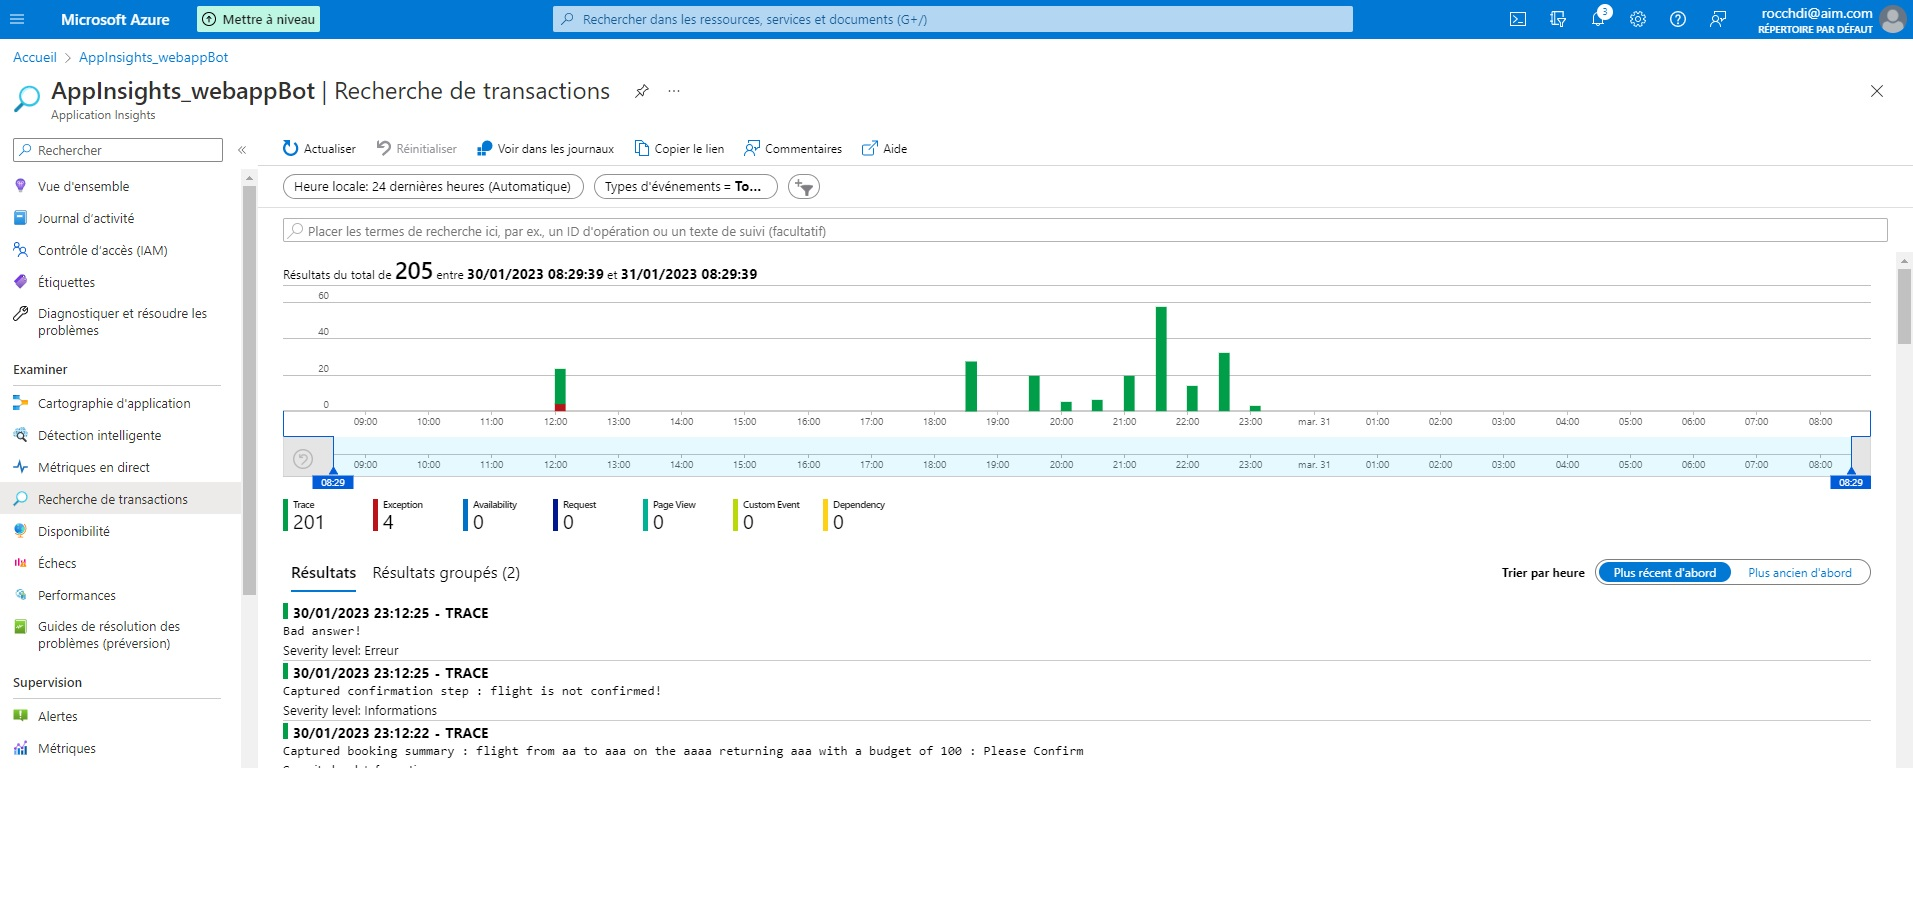


Ressources :

Vue d'ensemble d’Application Insights :

https://learn.microsoft.com/fr-fr/azure/azure-monitor/app/app-insights-overview?tabs=python

Création d’une ressource Application Insights dans Azure :

https://learn.microsoft.com/fr-fr/azure/azure-monitor/app/create-new-resource?tabs=net

https://learn.microsoft.com/fr-fr/azure/azure-monitor/app/create-new-resource?tabs=net#create-an-application-insights-resource-1


Configurer Azure Monitor pour votre application Python :

https://learn.microsoft.com/fr-fr/azure/azure-monitor/app/opencensus-python

Créer une nouvelle règle d’alerte :

https://learn.microsoft.com/fr-fr/azure/azure-monitor/alerts/alerts-create-new-alert-rule?tabs=metric

Supervision des applications pour Azure

https://learn.microsoft.com/fr-fr/azure/azure-monitor/app/azure-web-apps-net-core?tabs=Windows%2Cwindows

 
Rechercher et diagnostiquer les problèmes de performances à l’aide d’Application Insights:

https://learn.microsoft.com/fr-fr/azure/azure-monitor/app/tutorial-performance

# 8. Sauvegarde sur Github

Ce travail a été sauvegardé sur github (système de gestion de versions) sous le repository suivant :


https://github.com/rocchdi/ChatBot-book-flight

# 9. Déploiement du chatbot sur Azure web App

l’exécution du pipeline complet pour générer l’application web chatbot est impanté sur github en utilisant l'option "actions" de github.

### Description du pipeline de traitement

voici le shéma général d'architecture :

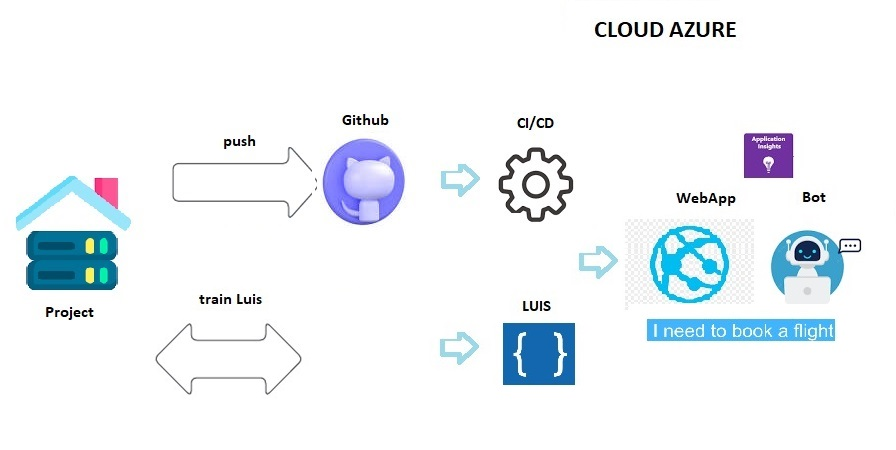

# 10 . Azure web App

La web app est accéssible avec le navigateur et permet de tester le s fonctionnalités du flight booking bot